In [66]:
%%capture
%run face-model-training.ipynb
%run nose-model-training.ipynb

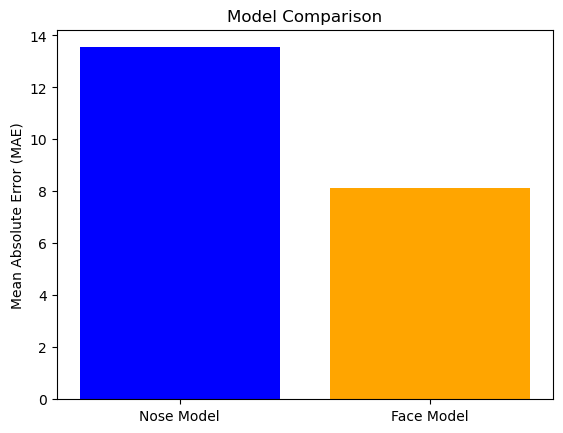

In [67]:
mae_face = model_results_1  # MAE van het eerste model
mae_nose = model_results_2  # MAE van het tweede model
history_face = history_1  # History van het eerste model
history_nose = history_2  # History van het tweede model  
model_face = model_1  # Model van het eerste model
model_nose = model_2  # Model van het tweede model
df_face = df_1  # Dataframe van het eerste model
df_nose = df_2  # Dataframe van het tweede model

import matplotlib.pyplot as plt

results = [mae_nose, mae_face]
model_labels = ['Nose Model', 'Face Model']

plt.bar(model_labels, results, color=['blue', 'orange'])
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Model Comparison')
plt.show()

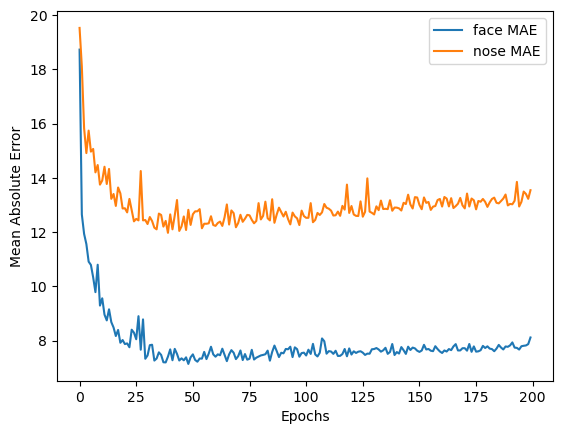

In [75]:
import matplotlib.pyplot as plt

# Plot training history
plt.plot(history_face.history['val_mae'], label='face MAE')
plt.plot(history_nose.history['val_mae'], label='nose MAE')

plt.xlabel('Epochs')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.show()

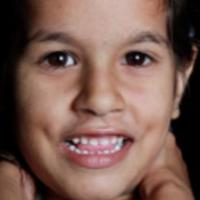

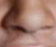

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step
Age based on face: 5.65
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Age based on nose: 7.21
Real age: 7


In [78]:
from tensorflow.keras.preprocessing.image import img_to_array
import numpy as np

index = 4002
face_image = df_face['Faces'][index]

display(face_image)

nose_image = df_nose['Noses'][index]
display(nose_image)

if face_image is not None:
    face_image = face_image.resize((32, 32))
    face_array = img_to_array(face_image) / 255.0
    prepared_image = np.expand_dims(face_array, axis=0)
    
    predicted_face_age = model_face.predict(prepared_image)
    
    print(f"Age based on face: {predicted_face_age[0][0]:.2f}")
else:
    print("No face image found")

if nose_image is not None:
    nose_image = nose_image.resize((32, 32))
    nose_array = img_to_array(nose_image) / 255.0
    prepared_image = np.expand_dims(nose_array, axis=0)
    
    predicted_nose_age = model_nose.predict(prepared_image)
    
    print(f"Age based on nose: {predicted_nose_age[0][0]:.2f}")
else:
    print("No nose image found")

print(f"Real age: {df_face['Ages'][index]}")
